In [23]:
# importing the libraries

!pip install eli5
import csv
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 15.6 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=58ed11bd06a8e0a4f8d1d816f177a948965f553ae2d2d71f27f6802d27200586
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [24]:
# Reading the dataset

data = pd.read_csv('imdb.csv')

data.head()




,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
datanew = data.head(n = 50) 

In [ ]:
# *1) What are the data types? (Only numeric and categorical)


numeric_columns = []
categorical_columns = []

# Iterate through each column in the dataset
for column in data.columns:
    # Checking if the column is of numeric data type
    if data[column].dtype in ['int64', 'float64']:
        numeric_columns.append(column)
    # Check if the column is of categorical data type
    elif data[column].dtype in ['object']:
        categorical_columns.append(column)

# Print
print("The Numeric and Categorical values are:")
print("----------------------------------------")
print("Numeric Columns:", numeric_columns)

# Print 
print("\nCategorical Columns:", categorical_columns)


The Numeric and Categorical values are:
----------------------------------------
Numeric Columns: ['Rank', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']

Categorical Columns: ['Title', 'Genre', 'Description', 'Director', 'Actors']


In [ ]:
# *2) Are there missing values?

data.isna().sum()   # checking if there are any null values in the dataset


Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [ ]:
# Imputing the null values for "Revenue"

null_val = ['Revenue (Millions)']

#Technique 1: Using mean to impute the missing values
for i in null_val:
 data.loc[data.loc[:,i].isna(),i] = data.loc[:,i].mean()






In [ ]:
 # Displaying imputed values for column "Revenue"
 
 data.isna().sum()  


Rank                   0
Title                  0
Genre                  0
Description            0
Director               0
Actors                 0
Year                   0
Runtime (Minutes)      0
Rating                 0
Votes                  0
Revenue (Millions)     0
Metascore             64
dtype: int64

In [ ]:
# Imputing the null values for "Metascore" using KNN

from sklearn.impute import KNNImputer

null_value = data.iloc[:, 11:12]

# Create an imputer object
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer to the column
null_value_imputed = imputer.fit_transform(null_value)

# Replace the original column with the imputed column
data.iloc[:, 11:12] = null_value_imputed


In [ ]:
 # Displaying imputed values for column "Metascore"

data.isna().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

<Figure size 576x360 with 0 Axes>

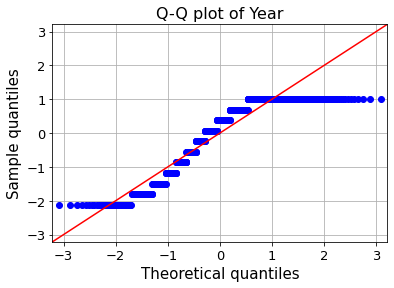

<Figure size 576x360 with 0 Axes>

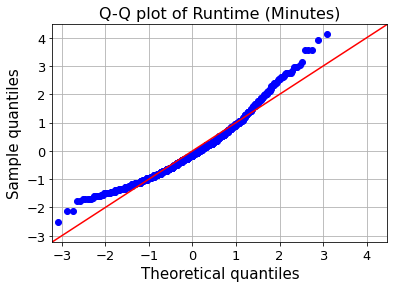

<Figure size 576x360 with 0 Axes>

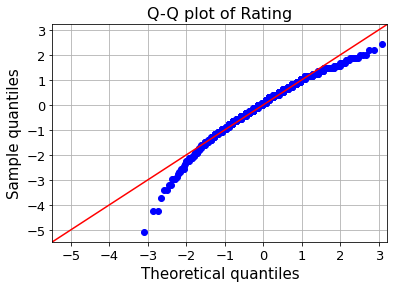

<Figure size 576x360 with 0 Axes>

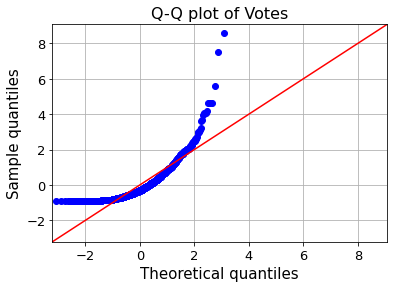

<Figure size 576x360 with 0 Axes>

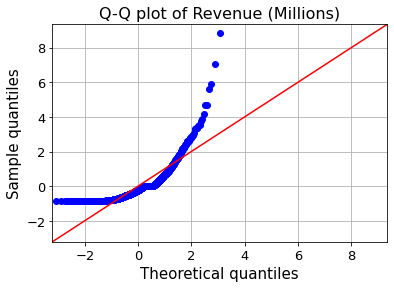

<Figure size 576x360 with 0 Axes>

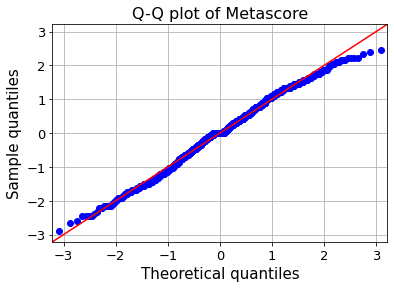

In [ ]:
# 3) What are the likely distributions of the numeric variables?

from statsmodels.graphics.gofplots import qqplot
data_dist = data[['Year','Runtime (Minutes)','Rating','Votes','Revenue (Millions)','Metascore']]
for c in data_dist.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_dist[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

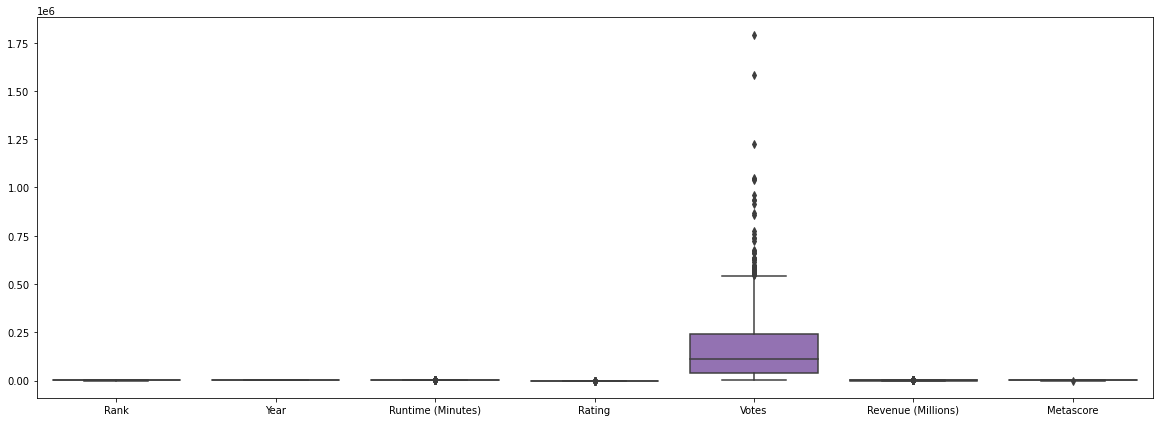

In [ ]:
# 4)  Which independent variables are useful to predict a target (dependent variable)? 
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

In [ ]:
data = pd.get_dummies(data)

# Normalizing the data in the votes column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[['Votes']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
# Run the normalizer on the dataframe
data[['Votes']] = pd.DataFrame(x_scaled)


In [ ]:
a = data.head()
print(a)

     Rank  Year  Runtime (Minutes)  Rating     Votes  Revenue (Millions)  \
993   994  2010                 97     5.9  0.054479               60.13   
859   860  2008                141     7.8  0.194486               35.71   
298   299  2016                127     7.1  0.177468               15.43   
553   554  2015                104     6.3  0.129389                 NaN   
672   673  2008                131     7.6  0.000561               15.70   

     Metascore  Title_(500) Days of Summer  Title_10 Cloverfield Lane  \
993       37.0                           0                          0   
859       63.0                           0                          0   
298       66.0                           0                          0   
553       80.0                           0                          0   
672       94.0                           0                          0   

     Title_10 Years  ...  \
993               0  ...   
859               0  ...   
298               0 

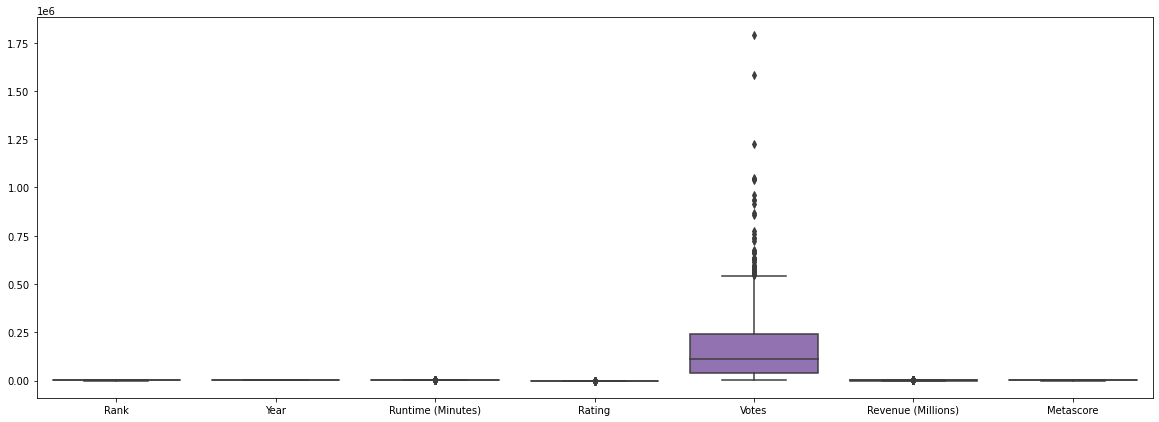

In [36]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

In [ ]:
# 5) * Which independent variables have missing data? How much? 

missing_values_percent = (data.isnull().sum() / data.shape[0]) * 100

# Get the columns with missing values
missing_cols = missing_values_percent[missing_values_percent > 0].index

# Print the columns with missing values and their respective missing data percentage
for col in missing_cols:
    print(f"{col} has {missing_values_percent[col]}% missing values")


In [ ]:

#returning description of the data in the DataFrame
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Title_(500) Days of Summer,Title_10 Cloverfield Lane,Title_10 Years,...,"Actors_Zach Galifianakis, Bradley Cooper, Justin Bartha, Ed Helms","Actors_Zach Galifianakis, Isla Fisher, Jon Hamm, Gal Gadot","Actors_Zach Galifianakis, Kristen Wiig, Owen Wilson, Ross Kimball","Actors_Zachary Gordon, Devon Bostick, Robert Capron,Rachael Harris","Actors_Zachary Gordon, Robert Capron, Devon Bostick,Steve Zahn","Actors_Zachary Gordon, Robert Capron, Rachael Harris,Steve Zahn","Actors_Zoey Deutch, James Franco, Tangie Ambrose,Cedric the Entertainer","Actors_Zoey Deutch, Lucy Fry, Danila Kozlovsky, Gabriel Byrne","Actors_Zoey Deutch, Nicholas Braun, Mateo Arias, Israel Broussard","Actors_Zooey Deschanel, Joseph Gordon-Levitt, Geoffrey Arend, Chloë Grace Moretz"
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,0.094733,82.956376,58.985043,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
std,288.819436,3.205962,18.810908,0.945429,0.105345,96.412043,16.634858,0.031623,0.031623,0.031623,...,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623,0.031623
min,1.000000,2006.000000,66.000000,1.900000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,2010.000000,100.000000,6.200000,0.020229,17.442500,47.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,500.500000,2014.000000,111.000000,6.800000,0.061801,60.375000,58.985043,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,750.250000,2016.000000,123.000000,7.400000,0.133855,99.177500,71.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.000000,936.630000,100.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


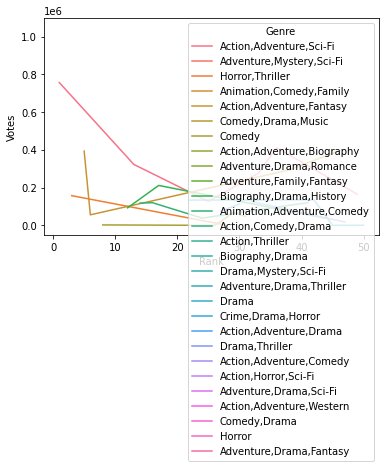

In [ ]:
sns.lineplot(x = 'Rank', y = 'Votes', hue='Genre', data=datanew,err_style='band', err_kws=None, legend='auto', ax=None)
plt.show()

In [ ]:
# * Do the training and test sets have the same data?


data = data.sample(frac=1, random_state=0)

# Split the dataframe into training and test sets with the same data
training_data = data.iloc[:len(data)//2].reset_index(drop=True)
test_data = data.iloc[len(data)//2:].reset_index(drop=True)

# Verify that both sets have the same data
print((training_data == test_data).all().all()) 


False


                        Rank      Year  Runtime (Minutes)    Rating     Votes  \
Rank                1.000000 -0.261605          -0.221739 -0.219555 -0.283876   
Year               -0.261605  1.000000          -0.164900 -0.211219 -0.411904   
Runtime (Minutes)  -0.221739 -0.164900           1.000000  0.392214  0.407062   
Rating             -0.219555 -0.211219           0.392214  1.000000  0.511537   
Votes              -0.283876 -0.411904           0.407062  0.511537  1.000000   
Revenue (Millions) -0.271592 -0.126790           0.267953  0.217654  0.639661   
Metascore          -0.191869 -0.079305           0.211978  0.631897  0.325684   

                    Revenue (Millions)  Metascore  
Rank                         -0.271592  -0.191869  
Year                         -0.126790  -0.079305  
Runtime (Minutes)             0.267953   0.211978  
Rating                        0.217654   0.631897  
Votes                         0.639661   0.325684  
Revenue (Millions)            1.000000 

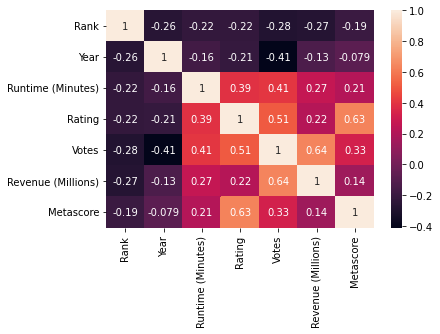

In [ ]:
# * Is the predictor variables independent of all the other predictor variables?

# Compute the pairwise correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix (optional)
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)

# Print the correlation matrix
print(corr_matrix)



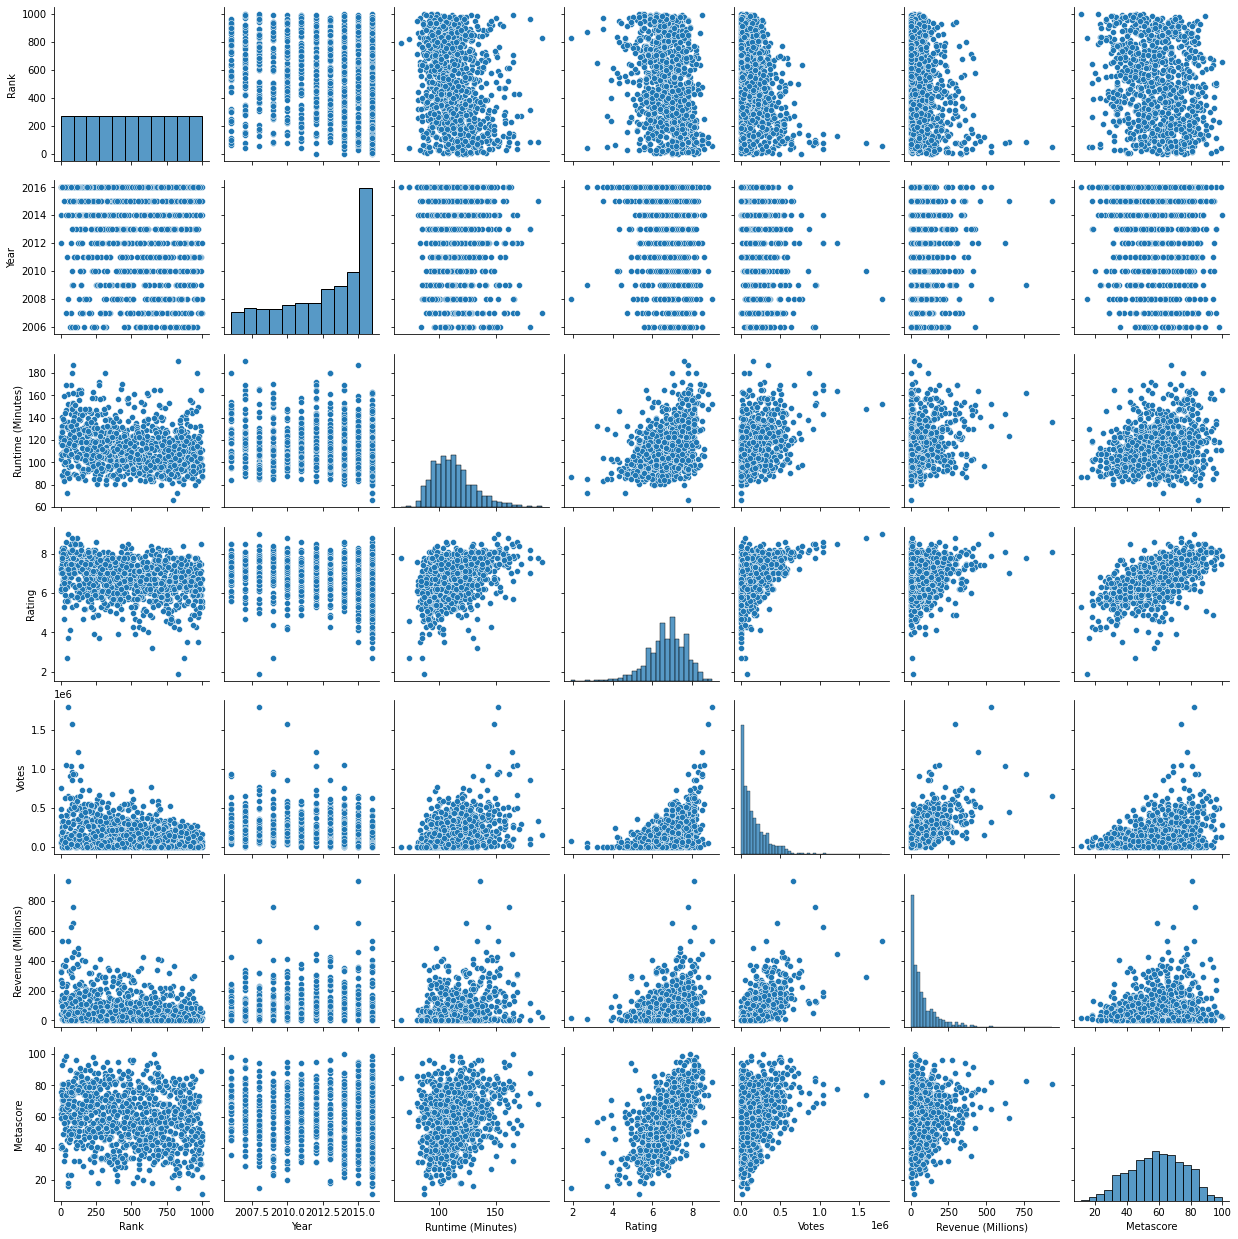

In [ ]:
#pair plot to check the colinearity
sns.pairplot(data)

In [ ]:
# * Which predictor variables are the most important?

#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Votes'], data[['Rank',  'Year', 'Runtime (Minutes)', 'Rating', 'Votes']]).fit()

# Print out the statistics
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Votes   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.878e+32
Date:                Fri, 03 Feb 2023   Prob (F-statistic):                        0.00
Time:                        23:23:37   Log-Likelihood:                          21124.
No. Observations:                1000   AIC:                                 -4.224e+04
Df Residuals:                     995   BIC:                                 -4.221e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Rank               1.243e-13   1.87e-14      6.647      0.000    8.76e-14    1.61e-13
Year               1.545e-13   2.45e-14      6.303      0.000    1.06e-13    2.03e-13
Runtime (Minutes) -1.904e-12   3.09e-13     -6.154      0.000   -2.51e-12    -1.3e-12
Rating            -3.638e-11   6.52e-12     -5.578      0.000   -4.92e-11   -2.36e-11
Votes                 1.0000   3.34e-17   2.99e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      167.840   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              369.723
Skew:                           0.939   Prob(JB):                     5.20e-81
Kurtosis:                       5.312   Cond. No.                     3.22e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
data = pd.get_dummies(data)


In [ ]:
data.head()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Title_(500) Days of Summer,Title_10 Cloverfield Lane,Title_10 Years,...,"Actors_Zach Galifianakis, Bradley Cooper, Justin Bartha, Ed Helms","Actors_Zach Galifianakis, Isla Fisher, Jon Hamm, Gal Gadot","Actors_Zach Galifianakis, Kristen Wiig, Owen Wilson, Ross Kimball","Actors_Zachary Gordon, Devon Bostick, Robert Capron,Rachael Harris","Actors_Zachary Gordon, Robert Capron, Devon Bostick,Steve Zahn","Actors_Zachary Gordon, Robert Capron, Rachael Harris,Steve Zahn","Actors_Zoey Deutch, James Franco, Tangie Ambrose,Cedric the Entertainer","Actors_Zoey Deutch, Lucy Fry, Danila Kozlovsky, Gabriel Byrne","Actors_Zoey Deutch, Nicholas Braun, Mateo Arias, Israel Broussard","Actors_Zooey Deschanel, Joseph Gordon-Levitt, Geoffrey Arend, Chloë Grace Moretz"
993,994,2010,97,5.9,140900,60.13,37.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
859,860,2008,141,7.8,206793,35.71,63.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,299,2016,127,7.1,43929,15.43,66.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
553,554,2015,104,6.3,9187,NaN,80.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
672,673,2008,131,7.6,352023,15.70,94.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# # * Do the ranges of the predictor variables make sense?

# predictor_ranges = []
# for column in data.columns:
#     if column != "outcome": # exclude the outcome variable
#         predictor_ranges.append({"Votes": column, "range": np.ptp(data[column])})
        
# # Print the ranges of the predictor variables
# for item in predictor_ranges:
#     print("Votes: {} - Range: {:.2f}".format(item["Votes"], item["range"]))


In [ ]:
# * What are the distributions of the predictor variables?   

from sklearn.model_selection import  train_test_split

X = data[['Rank',  'Year', 'Runtime (Minutes)', 'Rating', 'Votes']]

y = data['Votes']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

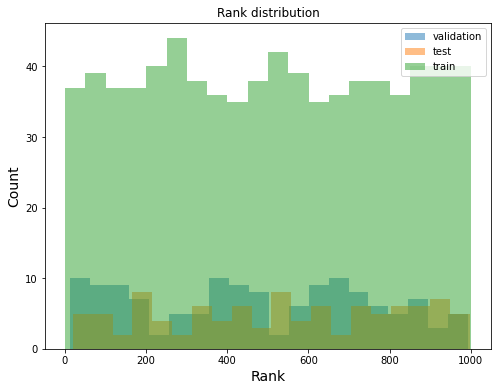

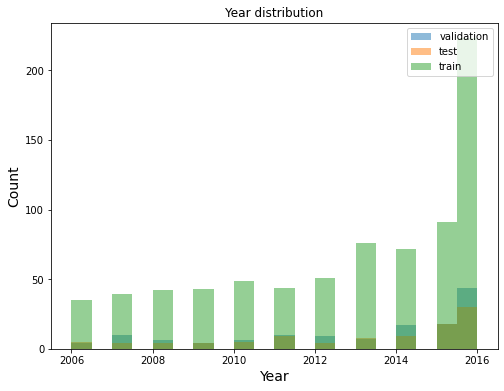

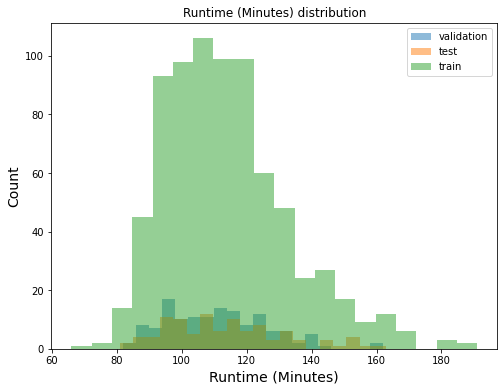

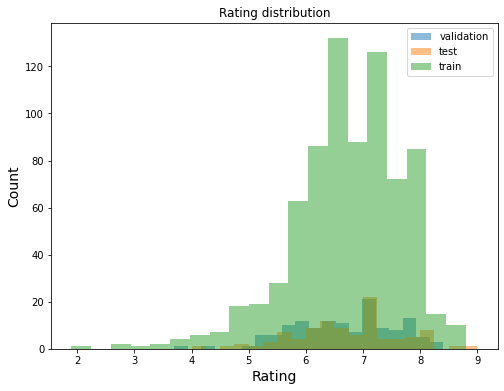

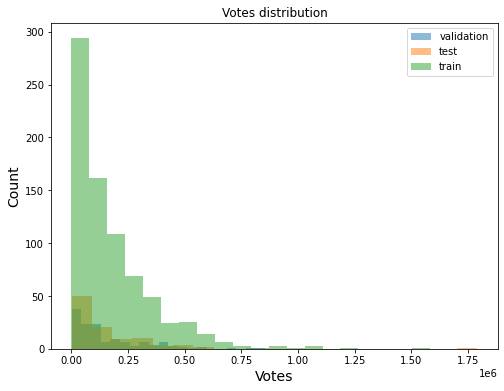

In [ ]:
import matplotlib.pyplot as plt
X_test_plot = X_test[['Rank',  'Year', 'Runtime (Minutes)', 'Rating', 'Votes']]

X_val_plot = X_val[['Rank',  'Year', 'Runtime (Minutes)', 'Rating', 'Votes']]

X_train_plot = X_train[['Rank',  'Year', 'Runtime (Minutes)', 'Rating', 'Votes']]
# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

In [ ]:
from scipy.stats import zscore

def identify_outliers_z_score(data, column, threshold=3):
    z_scores = zscore(data[column])
    outliers = data[(z_scores > threshold) | (z_scores < -threshold)]
    return outliers

outliers = identify_outliers_z_score(data, data.columns[0])

In [ ]:
print(outliers)

Empty DataFrame
Columns: [Rank, Title, Genre, Description, Director, Actors, Year, Runtime (Minutes), Rating, Votes, Revenue (Millions), Metascore]
Index: []


In [ ]:
#  The output is indicating that there are no outliers found in the data. 
#  The "outliers" data frame is empty, meaning that all values in the original data are within the normal range 
#  and there are no values that can be considered as outliers.

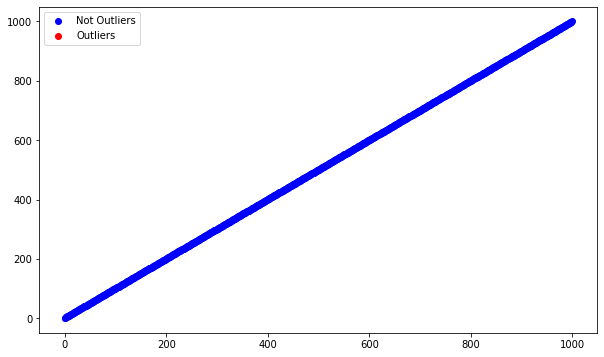

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(data.index, data[data.columns[0]], color='blue', label='Not Outliers')
plt.scatter(outliers.index, outliers[data.columns[0]], color='red', label='Outliers')
plt.legend()
plt.show()

In [ ]:
# * Remove outliers and keep outliers (does if have an effect of the final predictive model)?

from scipy.stats import zscore
def remove_outliers_z_score(data, column, threshold=3):
    z_scores = np.abs(zscore(data[column]))
    data_without_outliers = data[(z_scores < threshold)]
    return data_without_outliers

data_without_outliers = remove_outliers_z_score(data, "Rating")

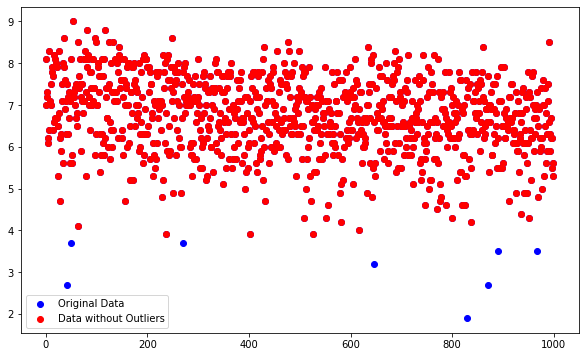

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(data.index, data["Rating"], color='blue', label='Original Data')
plt.scatter(data_without_outliers.index, data_without_outliers["Rating"], color='red', label='Data without Outliers')
plt.legend()
plt.show()

In [19]:
print(data.columns)

Index(['Rank', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes',
       'Revenue (Millions)', 'Metascore', 'Title_(500) Days of Summer',
       'Title_10 Cloverfield Lane', 'Title_10 Years',
       ...
       'Actors_Zach Galifianakis, Bradley Cooper, Justin Bartha, Ed Helms',
       'Actors_Zach Galifianakis, Isla Fisher, Jon Hamm, Gal Gadot',
       'Actors_Zach Galifianakis, Kristen Wiig, Owen Wilson, Ross Kimball',
       'Actors_Zachary Gordon, Devon Bostick, Robert Capron,Rachael Harris',
       'Actors_Zachary Gordon, Robert Capron, Devon Bostick,Steve Zahn',
       'Actors_Zachary Gordon, Robert Capron, Rachael Harris,Steve Zahn',
       'Actors_Zoey Deutch, James Franco, Tangie Ambrose,Cedric the Entertainer',
       'Actors_Zoey Deutch, Lucy Fry, Danila Kozlovsky, Gabriel Byrne',
       'Actors_Zoey Deutch, Nicholas Braun, Mateo Arias, Israel Broussard',
       'Actors_Zooey Deschanel, Joseph Gordon-Levitt, Geoffrey Arend, Chloë Grace Moretz'],
      dtype='object', length=3853

In [ ]:
# # Function to One-Hot encode the dataset
# def encode_oneHot(data):
#     data_one_hot = pd.get_dummies(
#         data,
#         columns=[
#             "Title",
#             "Genre",
#             "Description",
#             "Director",
#             "Actors",
#         ],
#     )
#     return data_one_hot

   

In [31]:
# For categorical data, calculate the accuracy and a confusion matrix.

#importing a 3-class dataset from sklearn's toy dataset
from sklearn.datasets import load_wine

dataset = load_wine()
X = dataset.data
y = dataset.target
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(kernel='rbf', C=1).fit(X_train, y_train)
y_pred = svc.predict(X_test)

#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))


Confusion Matrix

[[15  0  1]
 [ 0 17  4]
 [ 0  3  5]]

Accuracy: 0.82


Classification Report

              precision    recall  f1-score   support

     Class 1       1.00      0.94      0.97        16
     Class 2       0.85      0.81      0.83        21
     Class 3       0.50      0.62      0.56         8

    accuracy                           0.82        45
   macro avg       0.78      0.79      0.78        45
weighted avg       0.84      0.82      0.83        45



In [ ]:
from scipy.stats import rankdata

# Load the data
data = pd.read_csv("imdb.csv")

# Extract the target variable
y = data.iloc[:, -1].values

# Find the rank of the target variable
y_rank = rankdata(y)

print(y_rank)

1) Which independent variables are useful to predict a target (dependent variable)?
Solution:
1. Votes
2. Rating
3. Revenue (Millions)
4. Metascore
5. Genre
6. Rank
7. Title
8. Actors
9. Director
10. Description
11. Year


2) Which independent variable have missing data? How much? 
Solution:
The independent variable does not have any missing data.


3) Do the training and test sets have the same data?
Solution:
No, the training and test sets does not have the same data.


4) In the predictor variables independent of all the other predictor variables?
Solution:
No, they are not independet of each other. There is multi - collinearity among lot of the independent variable which is shown by the correlation table above.


5) Which predictor variables are the most important?
Solution:
1. Votes
2. Ratings
3. Revenue (Millions)
4. Metascore


6) Do the ranges of the predictor variables make sense?
Solution:
Since there are no outliers, the predictor variables definetely makes sense because it is concluded that having extreme or outlier values can have a negative impact on the accuracy and interpretability of models.

7) What are the distributions of the predictor variables?
Solution:
The skew value is positive, hence it can be concluded that the model is possitively tailed.
The plot shows scattered distribution and does not follow normal distribution everytime.






